# Step 01

### Importing spark and required libraries

In [1]:
# Importing regex library
import re

# Importing stopwords from nltk package
from nltk.corpus import stopwords

# Create entry points to spark
from pyspark import SparkContext, SparkConf

# Importing matplotlib library to plot graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Importing math library to calculate log base 10 
import math

### Initializing spark

In [2]:
# We add this line to avoid an error : "Cannot run multiple SparkContexts at once". 
# If there is an existing spark context, we will reuse it instead of creating a new context.
sc = SparkContext.getOrCreate()

# local[*]: run Spark locally with as many working processors as logical cores on your machine.
# In the field of `master`, we use a local server with as many working processors (or threads) as possible (i.e. `local[*]`). 
# If we want Spark to run locally with 'k' worker threads, we can specify as `local[k]`.
# The `appName` field is a name to be shown on the Sparking cluster UI. 

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Analysing Text Data")

print(sc)  # printing the spark context (checking if it is initialized)

<SparkContext master=local[*] appName=pyspark-shell>


In [3]:
# # To stop the spark context
# sc.stop()

### Saving file location into a variable

In [4]:
# For part A (Two txt files)
# Change the file path accordingly to run
book1 = '/srv/home/sver0016/FIT5202/Assignment 1/Datasets-20190815/Datasets/Agile Processes  in Software Engineering  and Extreme Programming.txt'
book2 = '/srv/home/sver0016/FIT5202/Assignment 1/Datasets-20190815/Datasets/Scrum Handbook.txt'

# Step 02

### Creating RDD and displaying number of lines in each RDD

In [5]:
# For Book1 :
book1RDD = sc.textFile(book1)
print("Number of lines in Book 1 : ",book1RDD.count())

print('=====================================')

# For Book2 :
book2RDD = sc.textFile(book2)
print("Number of lines in Book 2 : ",book2RDD.count())

Number of lines in Book 1 :  21569
Number of lines in Book 2 :  4617


# Step 03

### Cleaning/Manipulating text

In [6]:
def cleanText(bookRDD):
    
    bookRDD = bookRDD.lower()    # Convert into lower case
    bookRDD = re.sub('[^a-z\s]', '', bookRDD)     # Removing all characters except lower case alphabets and space
    bookRDD = bookRDD.strip()      # Stripping starting and trailing spaces in a line
    bookRDD = re.sub('\s+', ' ', bookRDD)      # Substituting multiple spaces in between words with single space
    bookRDD = bookRDD.split('\n')    # Split based on new line so that each element is a line
    
    for element in bookRDD:
        if element == '':        # If the element is an empty string, then remove it from the list
            bookRDD.remove(element)
            
    return bookRDD

In [7]:
# Displaying contents of cleanedBook1RDD after applying function above
cleanedBook1RDD = book1RDD.flatMap(cleanText)
cleanedBook1RDD.collect()

['lnbip',
 'i helen sharp',
 'tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open',
 'lecture notes',
 'in business information processing',
 'series editors',
 'wil van der aalst',
 'eindhoven technical university eindhoven the netherlands',
 'john mylopoulos',
 'university of trento povo italy',
 'michael rosemann',
 'queensland university of technology brisbane qld australia',
 'michael j shaw',
 'university of illinois urbanachampaign il usa',
 'clemens szyperski',
 'microsoft research redmond wa usa',
 'more information about this series at httpwwwspringercomseries',
 'helen sharp tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open',
 'editors',
 'helen sharp',
 'computing and communications',
 'department',
 'the open universi

In [8]:
# Displaying contents of cleanedBook2RDD after applying function above
cleanedBook2RDD = book2RDD.flatMap(cleanText)
cleanedBook2RDD.collect()

['jeff sutherlands',
 'scrum handbook',
 'everything',
 'you need',
 'to know',
 'to start',
 'a scrum project',
 'in your',
 'organization',
 'scrum',
 'training',
 'institute',
 'm w press',
 'this book is dedicated to nobel laureate muhammad yunus and the',
 'grameen bank for originating microenterprise development and the',
 'accion international presidents advisory board responsible for much of',
 'microenterprise development in the western hemisphere',
 'the strategy for bootstrapping the poor out of poverty has been',
 'a model for freeing hundreds of thousands of software developers from',
 'developer abuse caused by poor management practices',
 'thanks to the reviewers of the text who include among many others',
 'tom poppendieck',
 'hen rick kniberg',
 'rowan bunning',
 'clifford thompson',
 'about this book',
 'this manual is based on the scrum papers published by the scrum',
 'training institute see wwwscrumtraininginstitutecom',
 'for information on how to receive your own

# Step 04

### Transforming the data/Counting the words

In [9]:
# For Book 1:

# Splitting RDD based on space 
transformedBook1RDD = cleanedBook1RDD.flatMap(lambda x: x.split(' '))

# Converting word to a key/value pair of (word, 1)
transformedBook1RDD = transformedBook1RDD.map(lambda x: (x, 1))

# Reducing the value based on the word
CountWordsBook1RDD = transformedBook1RDD.reduceByKey(lambda x, y: x+y)

# Sorting RDD in descending order based on value and displaying top 20 words
sortedBook1RDD = CountWordsBook1RDD.sortBy(lambda x : x[1], False)
sortedBook1RDD.take(20)

[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

In [10]:
# For Book 2:

# Splitting RDD based on space and converting word to a key/value pair of (word, 1)
transformedBook2RDD = cleanedBook2RDD.flatMap(lambda x: x.split(' '))

# Converting word to a key/value pair of (word, 1)
transformedBook2RDD = transformedBook2RDD.map(lambda x: (x, 1))

# Reducing the value based on the word
CountWordsBook2RDD = transformedBook2RDD.reduceByKey(lambda x, y: x+y)

# Sorting RDD in descending order based on value and displaying top 20 words
sortedBook2RDD = CountWordsBook2RDD.sortBy(lambda x : x[1], False)
sortedBook2RDD.take(20)

[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

# Step 05

### Removing stop words

In [11]:
# Create a set of stop words in english language
stopWords = set(stopwords.words('english'))

In [12]:
# For Book 1

# Removing stop words from RDD
removeStopWordsBook1RDD = sortedBook1RDD.filter(lambda word : word[0] not in stopWords)

# Storing total number of words in a variable to calculate average occurrence of words
book1TotalWordsNumber = removeStopWordsBook1RDD.values().sum()

# Selecting unique words from RDD
uniqueWordsBook1RDD = removeStopWordsBook1RDD.keys()

# Storing unique number of words in a variable to calculate average occurrence of words
book1UniqueWordsNumber = uniqueWordsBook1RDD.count()

# Displaying unique and total words in RDD
print('Number of unique words in Book 1 : ',book1UniqueWordsNumber)

Number of unique words in Book 1 :  9611


In [13]:
# For Book 2

# Removing stop words from RDD
removeStopWordsBook2RDD = sortedBook2RDD.filter(lambda word : word[0] not in stopWords)

# Storing total number of words in a variable to calculate average occurrence of words
book2TotalWordsNumber = removeStopWordsBook2RDD.values().sum()

# Selecting unique words from RDD
uniqueWordsBook2RDD = removeStopWordsBook2RDD.keys()

# Storing unique number of words in a variable to calculate average occurrence of words
book2UniqueWordsNumber = uniqueWordsBook2RDD.count()

# Displaying unique words in RDD
print('Number of unique words in Book 2 : ',book2UniqueWordsNumber)

Number of unique words in Book 2 :  2936


# Step 06

### Find average occurrence of a word

In [14]:
# For Book 1

print('Average occurrence of a word in Book 1 : ', round((book1TotalWordsNumber/book1UniqueWordsNumber),2))

print('==================================================')

# For Book 2
print('Average occurrence of a word in Book 2 : ', round((book2TotalWordsNumber/book2UniqueWordsNumber),2))

Average occurrence of a word in Book 1 :  8.23
Average occurrence of a word in Book 2 :  3.68


# Step 07

### Exploratory data analysis

### Distribution of words in Book1 and Book2

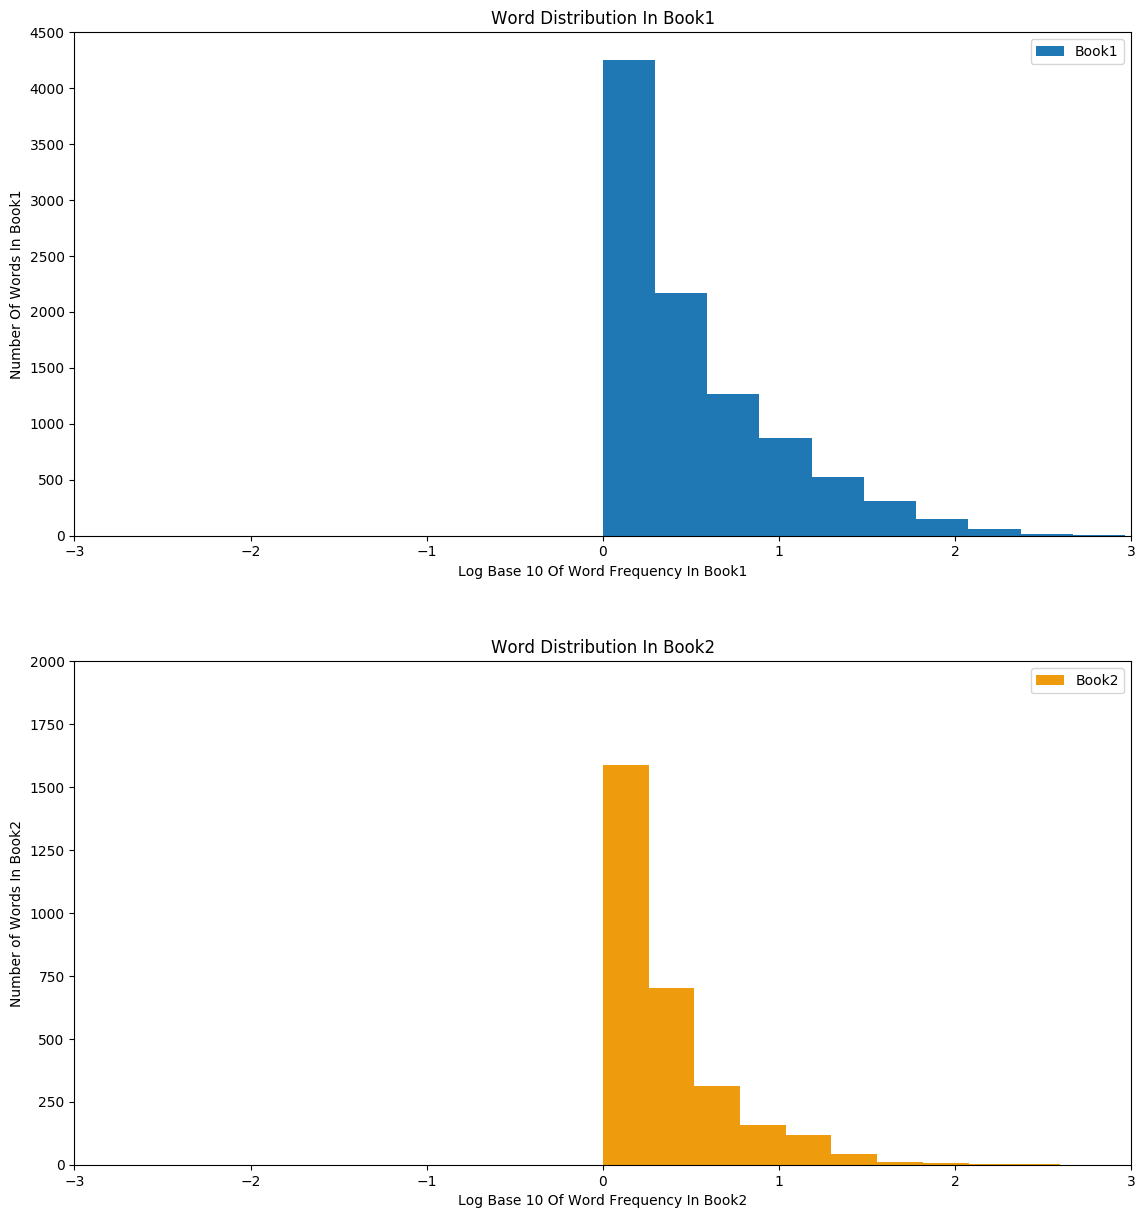

In [15]:
# Distribution of words in Book1 and Book2 

# Calculation of log base 10 of the values in Book1
log10ListBook1 = []
listBook1 = removeStopWordsBook1RDD.values().collect()
[log10ListBook1.append(math.log10(number)) for number in listBook1]

# Calculation of log base 10 of the values in Book2
log10ListBook2 = []
listBook2 = removeStopWordsBook2RDD.values().collect()
[log10ListBook2.append(math.log10(number)) for number in listBook2]

# Define the figure size
plt.figure(figsize=[30,15], dpi=100)


# Plot the histogram graph
# For Book1
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.25)
plt.hist(log10ListBook1, bins = 10, label='Book1')
plt.legend()
plt.title("Word Distribution In Book1")
plt.xlabel("Log Base 10 Of Word Frequency In Book1")
plt.ylabel("Number Of Words In Book1")

# Range of x and y values on the plot
plt.ylim((0,4500))
plt.xlim((-3,3))

# For Book2
plt.subplot(2,2,3)
plt.hist(log10ListBook2, bins = 10, label='Book2', color='#ee9c0d')
plt.legend()
plt.title("Word Distribution In Book2")
plt.xlabel("Log Base 10 Of Word Frequency In Book2")
plt.ylabel("Number of Words In Book2")

# Range of x and y values on the plot
plt.ylim((0,2000))
plt.xlim((-3,3))

plt.show()

In [16]:
# Explanation that words with frequency 1 in Book1 and Book2 match the plot and code below

minBook1 = removeStopWordsBook1RDD.values().min()
maxBook1 = removeStopWordsBook1RDD.values().max()

minBook2 = removeStopWordsBook2RDD.values().min()
maxBook2 = removeStopWordsBook2RDD.values().max()


countMin1 = removeStopWordsBook1RDD.values().filter(lambda x : x == minBook1).count()
print('Number of words with lowest frequency in Book1: ',countMin1)

countMax1 = removeStopWordsBook1RDD.values().filter(lambda x : x == maxBook1).count() 
print('Number of words with highest frequency in Book1: ',countMax1)

print('=======================================================')

countMin2 = removeStopWordsBook2RDD.values().filter(lambda x : x == minBook2).count()
print('Number of words with lowest frequency in Book2: ',countMin2)

countMax2 = removeStopWordsBook2RDD.values().filter(lambda x : x == maxBook2).count()
print('Number of words with highest frequency in Book2: ',countMax2)

Number of words with lowest frequency in Book1:  4252
Number of words with highest frequency in Book1:  1
Number of words with lowest frequency in Book2:  1588
Number of words with highest frequency in Book2:  1


**Explanation :** 

The histogram plot best represents the distribution trend. That is the reason I've chosen to plot histogram.

There are no elements on the negative X axis and Y axis because word count/frequency cannot be in negative. From the above steps, we know that the minimum and maximum count of the words in both Book1 and Book2. The above graph and the word frequency in Book1 and Book2 show that there are more number of words having less word count (the number of words with word count as 1 in Book1 is 4252 whereas the number of words with word count as 1 in Book2 is 1588). As we move towards the right of the graph,we observe that there are less words with high word count (the number of words with word count greater than 900 in Book1 is 1 whereas the number of words with word count greater than 300 in Book2 is 1) and the possibility that there will be more number of words with high word count within a book reduces. This implies that there are more number of words which have less frequency in a book compared to the words which have high frequency. It can be seen in the graphs that Book1 has a few words with very high count (as much as close to 1000) as the first graph shows values uptil 3 on x-axis whereas Book2 has very few  words with high count(as much as close to 400) as the second graph shows values uptil 2.5 on the x-axis. We can also conclude that overall, Book1 has more number of words compared to the Book2.

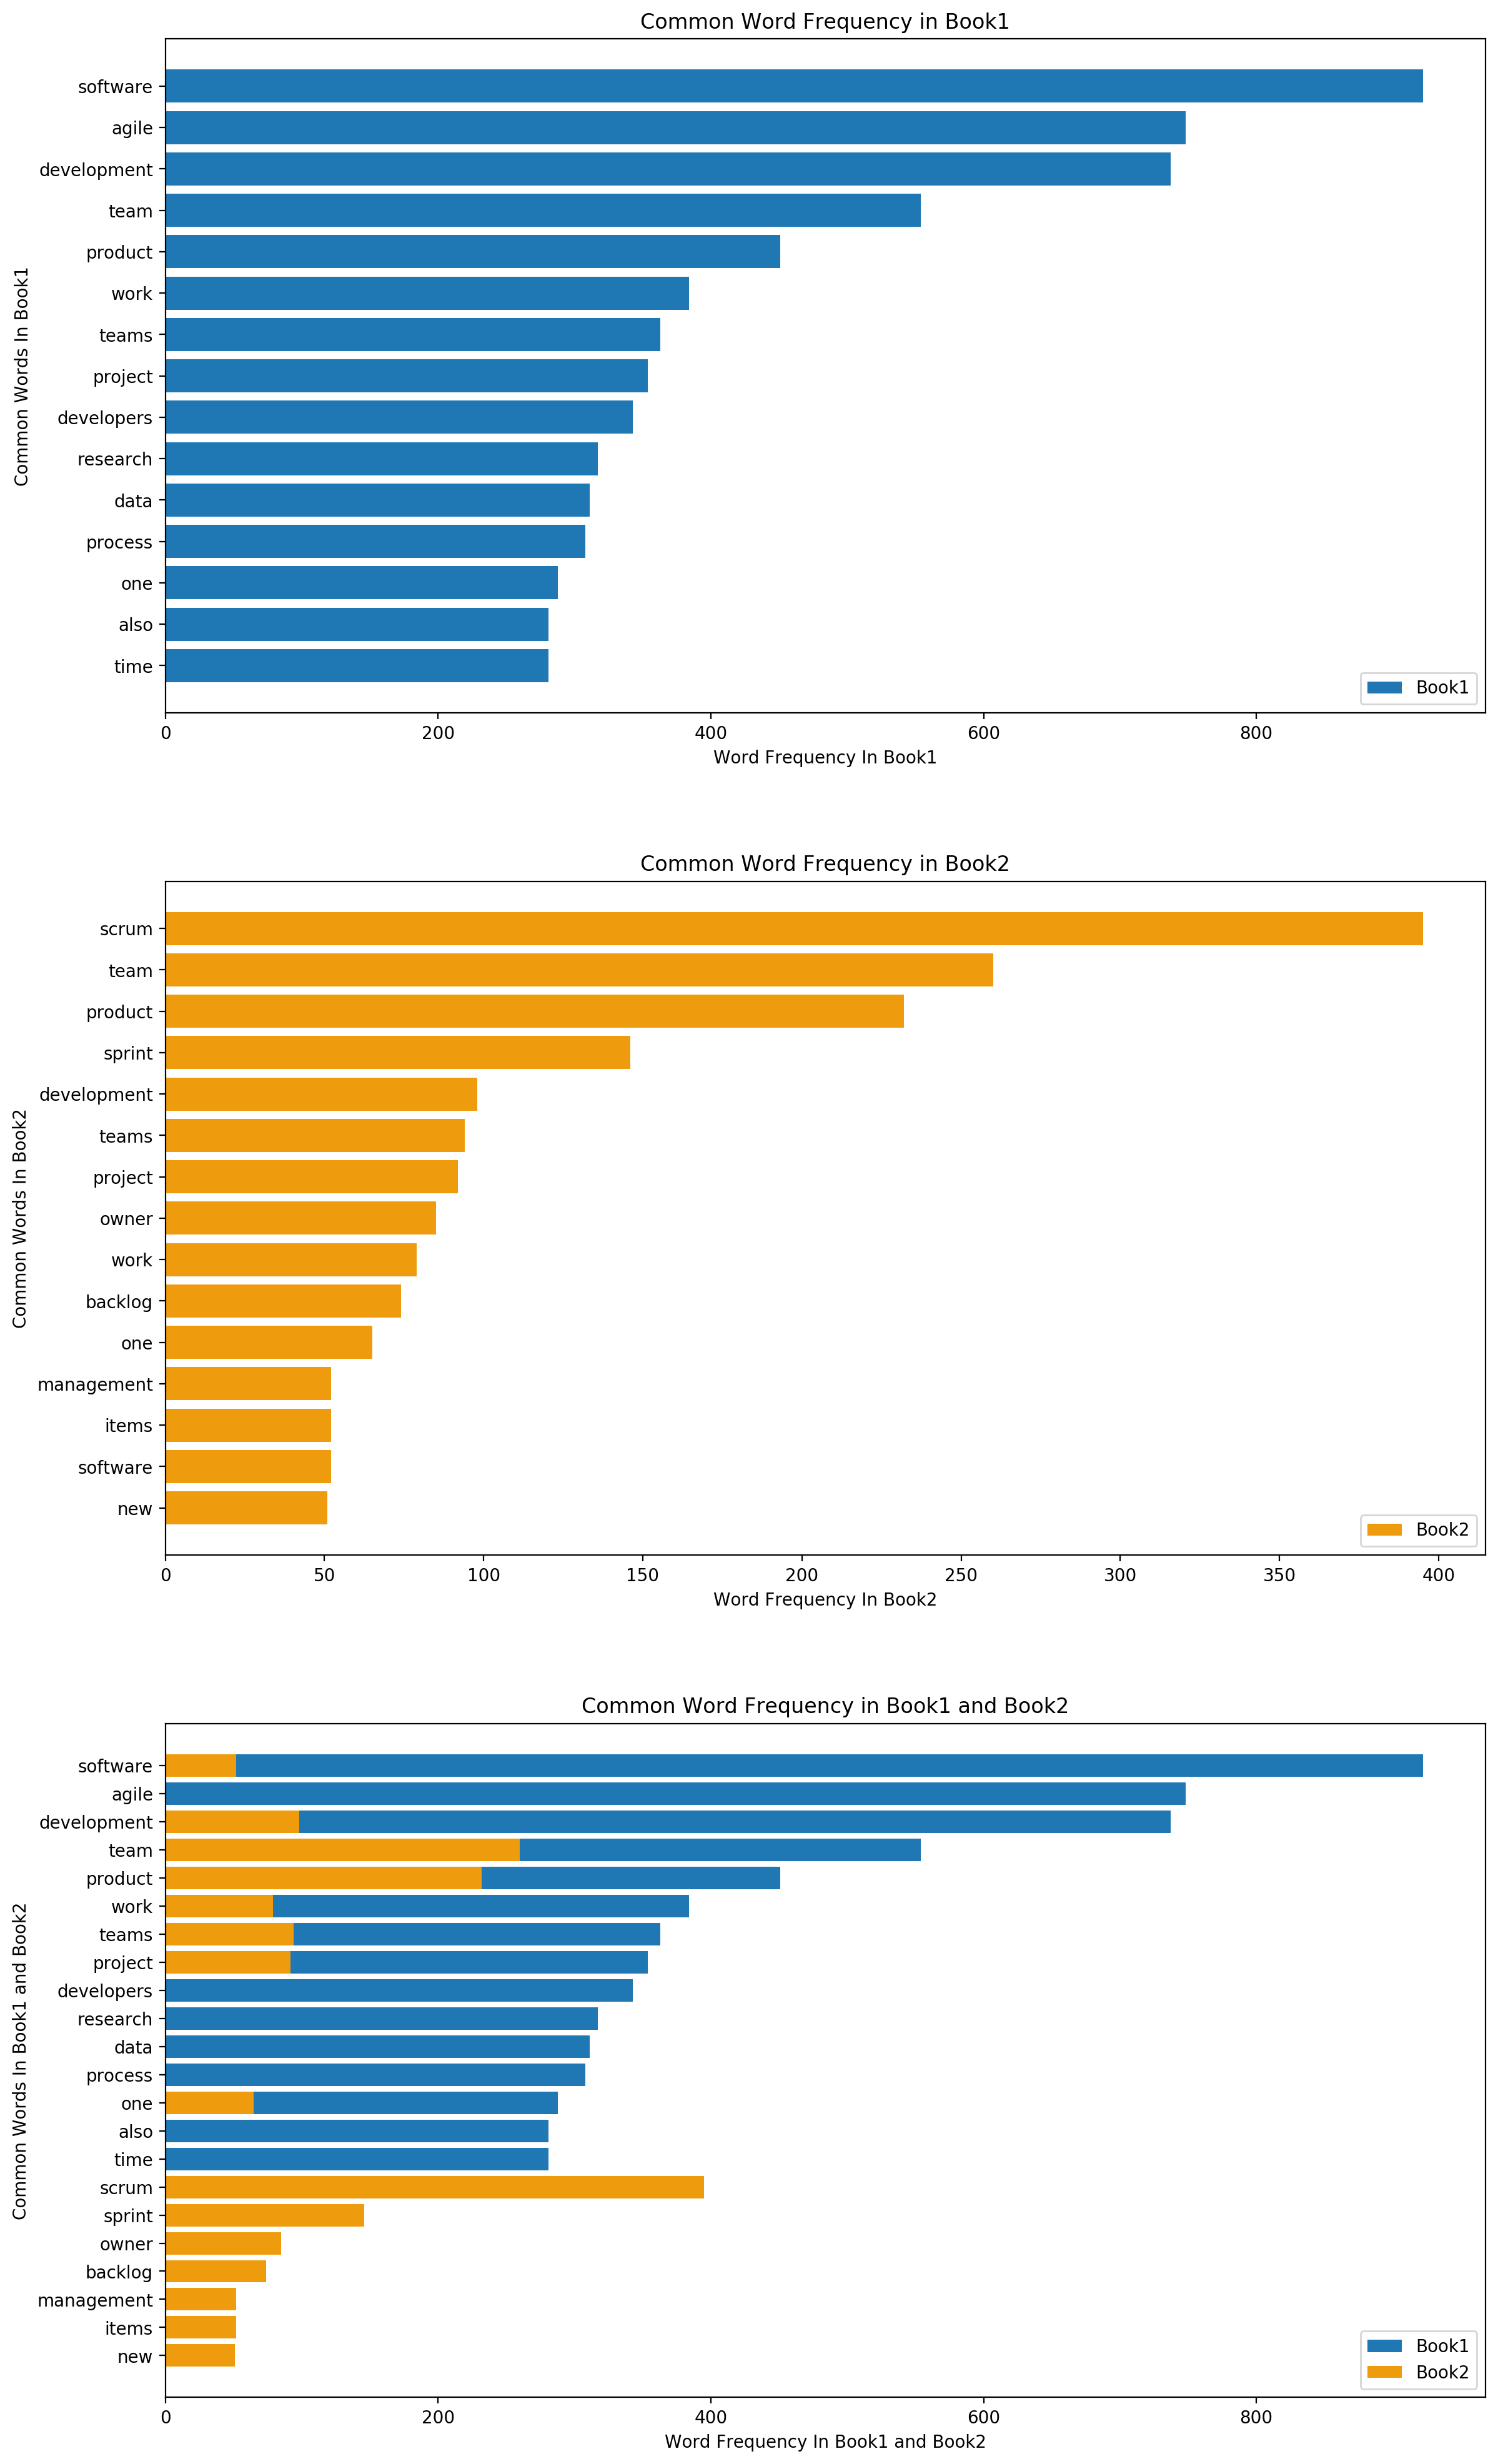

In [17]:
# Compare common word frequency in Book1 and Book2

# Sort the data from step 5 in Book1 and extract list of keys and values
book1Words = removeStopWordsBook1RDD.sortBy(lambda x : x[1], False).keys().take(15)
book1Values = removeStopWordsBook1RDD.sortBy(lambda x : x[1], False).values().take(15)

# Sort the data from step 5 in Book2 and extract list of keys and values
book2Words = removeStopWordsBook2RDD.sortBy(lambda x : x[1], False).keys().take(15)
book2Values = removeStopWordsBook2RDD.sortBy(lambda x : x[1], False).values().take(15)

# Define the figure size
plt.figure(figsize=[30,25], dpi=200)

# Plot bar graphs for Book1 and Book2
plt.subplot(3,2,1)
plt.subplots_adjust(hspace=0.25)
plt.barh(book1Words,book1Values, label='Book1')
plt.legend()
plt.xlabel('Word Frequency In Book1')
plt.ylabel('Common Words In Book1')
plt.title('Common Word Frequency in Book1')
plt.gca().invert_yaxis()

plt.subplot(3,2,3)
plt.barh(book2Words,book2Values, label='Book2', color='#ee9c0d')
plt.legend()
plt.xlabel('Word Frequency In Book2')
plt.ylabel('Common Words In Book2')
plt.title('Common Word Frequency in Book2')
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
plt.barh(book1Words,book1Values, label='Book1')
plt.barh(book2Words,book2Values, label='Book2', color='#ee9c0d')
plt.legend()
plt.xlabel('Word Frequency In Book1 and Book2')
plt.ylabel('Common Words In Book1 and Book2')
plt.title('Common Word Frequency in Book1 and Book2')
plt.gca().invert_yaxis()

plt.show()

**Explanation :** 

Bar graph is the best plot to display most common words and their count as each word is a single entity and has it's count. The first two graphs above display the 15 most common words and their word count in Book1 and Book2 in the decreasing order while last graph includes 15 most common words from both Book1 and Book2 represented in a single plot. 

The most common words in Book1 are _'software', 'agile', 'development', 'team', 'product', 'work', 'teams', 'project', 'developers', 'research', 'data', 'process', 'one', 'also'_ and _'time'_ in the order of decreasing word frequency while the most common words in Book2 are _'scrum', 'team', 'product', 'sprint', 'development', 'teams', 'project', 'owner', 'work', 'backlog', 'one', 'management', 'items', 'software'_ and _'new'_ in the order of decreasing word frequency.

For Book1, we can see that the word count of the common words ranges from about 900 to 300 whereas for Book2, we can see that the word count of the common words ranges from about 400 to 50. The most common word and the least common word from the list of 15 most common words in Book1 are _'software'_ and _'time'_ respectively. The most common word and the least common word from the list of 15 most common words in Book2 are _'scrum' and 'new'_ respectively. It can be inferred from the graphs that for Book1, the drop in the word count of the common words is gradual while for Book2, the drop in the word count of the common words is gradual for first three words and then it drops drastically. We can notice huge diference of about 500 in the word count between the words _'software'_ in Book1 and _'scrum'_ in Book2. The least common word from the list we picked from Book1, _'time'_ , has the word count close to the most common word, _'scrum'_ in Book2. 

The last graph depicts the common words frequency from Book1 and Book2. We can also point out the common words used in Book1 as well as Book2 - words such as _'software', 'development', 'team', 'product', 'work', 'teams', 'project'_ and _'one'_. The word _'team'_ occurred in both Book1 and Book2 the most number of times compared to other words whereas the word _'software'_ occurred in both Book1 and Book2 the least number of times compared to other words.

# References

- Monash tutorials and lecture demo files

- https://pythonspot.com/nltk-stop-words/

- https://matplotlib.org/3.1.1/gallery/index.html